In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader
from transformers import BertTokenizer

MODEL_NAME = "cl-tohoku/bert-base-japanese-whole-word-masking"
batch = 2
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertJapaneseTokenizer'. 
The class this function is called from is 'BertTokenizer'.


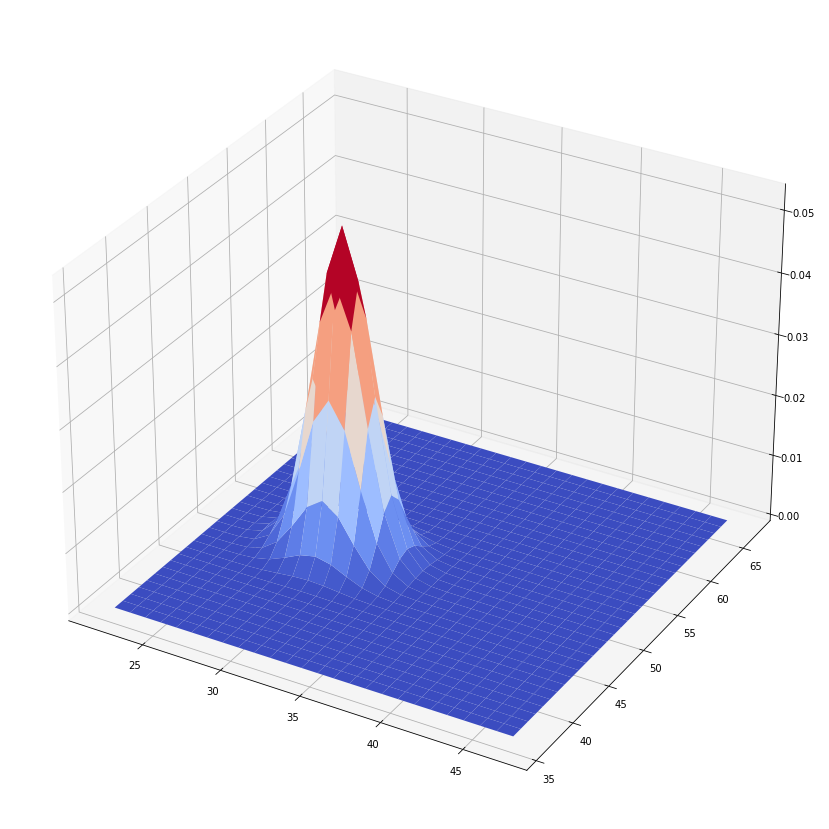

In [22]:
#2次元正規分布へ変換
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#関数に投入するデータを作成
x  = np.arange(22, 48, 1)
y = np.arange(36, 68, 1)
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()]

#二次元正規分布の確率密度を返す関数
def gaussian(x,mu,sigma):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

#2変数の平均値を指定
mu = np.array([30,50])
#2変数の分散共分散行列を指定
sigma = np.array([[3,0],[0,3]])

Z = gaussian(z,mu,sigma)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

In [23]:
#2変数の平均値を指定
mu = np.array([30,50])
#2変数の分散共分散行列を指定
sigma = np.array([[3,0],[0,3]])

Z_true = gaussian(z,mu,sigma)
shape = X.shape
Z_true = Z_true.reshape(shape)

mu = np.array([33,60])
Z_pred = gaussian(z,mu,sigma)
shape = X.shape
Z_pred = Z_pred.reshape(shape)



ce_loss = tf.keras.losses.CategoricalCrossentropy()
print(f'ce_loss = {ce_loss(Z_true, Z_pred).numpy()}')

ce_loss = 0.10837733432820935


In [24]:
df = pd.read_csv(
    '/data1/ohnishi/202271month_per_hour_geotaged_adGeocode_undersampled.csv'
)

In [25]:
df['code']=df['code'].astype(str)

In [26]:
df['x_mu'] = df['code'].str[2:4]
df['y_mu'] = df['code'].str[0:2]

In [27]:
df

,Unnamed: 0.1,Unnamed: 0,text,created_at,retweets,replies,likes,quote_count,place_id,author_id,...,city_name,object,country,UserPlase_longitude,UserPlase_latitude,UserPlase_sub_longitude,UserPlase_sub_latitude,code,x_mu,y_mu
0,0,444,また明日色々と載せます🙏本日はありがとうございました✨,2022-07-22_00:53:08,0.0,0.0,4.0,0,06ef846bfc783874,2814794005,...,日本,country,日本,122.904034,24.013343,153.997697,45.562897,3622,22,36
1,1,648,#インチキ効果もいい加減にしろアナコンダからのデスフェニ https://t.co/nYPN...,2022-07-16_17:57:12,0.0,0.0,3.0,0,06ef846bfc783874,1713093174,...,日本,country,日本,122.904034,24.013343,153.997697,45.562897,3622,22,36
2,2,244,@huwanekonya リボーン名古屋くらいで一緒にタコ踊り出来たような気がします！w,2022-07-11_00:56:40,0.0,1.0,2.0,0,06ef846bfc783874,2478240775,...,日本,country,日本,122.904034,24.013343,153.997697,45.562897,3622,22,36
3,3,1309,明日はツーリングに変更しますレン耐の皆さま、9月によろしくお願いします🥺 https://t...,2022-07-03_03:13:25,0.0,0.0,2.0,0,01cd8b8209498da4,983378570079698944,...,宮崎 九州地方,admin,日本,122.933784,24.045669,132.085336,34.708099,3622,22,36
4,4,53,@sakuramaru017 イタリア🇮🇹←ただ、自分が住むなら,2022-07-10_21:59:43,0.0,1.0,1.0,0,06ef846bfc783874,4881764733,...,日本,country,日本,122.904034,24.013343,153.997697,45.562897,3622,22,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655041,655041,533,南樺太は帰属未定やね https://t.co/y3OtUpokZH,2022-07-27_14:56:20,0.0,0.0,2.0,0,07d9f32e76c86000,1392710433899831300,...,宗谷岬,poi,日本,141.936650,45.522873,141.936650,45.522873,6841,41,68
655042,655042,1178,サウナ ✕ ウニ丼 https://t.co/VUeJQlgaVd,2022-07-17_14:54:58,0.0,1.0,22.0,0,101fdfd45f56c000,134809667,...,漁師の店,poi,日本,141.647044,45.447158,141.647044,45.447158,6841,41,68
655043,655043,1211,最北端で優雅に草食べてる鹿発見🤣宗谷岬着きました！ https://t.co/E64xKvEv0b,2022-07-30_13:54:45,1.0,10.0,204.0,2,07d9f32e76c86000,1466494584176144384,...,宗谷岬,poi,日本,141.936650,45.522873,141.936650,45.522873,6841,41,68
655044,655044,768,日本最北端のマクドナルド！ドナルドは入院から帰ってきたようです！良かった(•ᴗ•) http...,2022-07-26_15:53:50,1.0,1.0,5.0,0,07d9dbe918c85001,43887408,...,マクドナルド 40号稚内店,poi,日本,141.702988,45.395410,141.702988,45.395410,6841,41,68


In [28]:
x = "text"
y = "code"
index_train = int(len(df) * 0.8)
index_val = int(len(df) * 0.1)
index_test = int(len(df) * 0.1)
df[x] = df[x].str.replace(r'[【】]', ' ')       # 【】の除去
df[x] = df[x].str.replace(r'[（）()]', ' ')     # （）の除去
df[x] = df[x].str.replace(r'[［］\[\]]', ' ')   # ［］の除去
df[x] = df[x].str.replace(r'[@＠]\w+', '')  # メンションの除去
df[x]= df[x].str.replace(r'_', '')#underscodf[x].str 
df[x] = df[x].str.replace(r'https?:\/\/.*?[\r\n ]', '')  # URLの除去
df[x] = df[x].str.replace(r'http:\/\/.*?[\r\n ]', '')  # URLの除去
df[x] = df[x].str.replace(r'　', ' ')  # 全角空白の除去
df[x]=df[x].str.replace(' ','')
df = df.sample(frac=1, random_state=0)

df_train = df.iloc[0:100]
df_test = df.iloc[100:120]
df_val = df.iloc[120:140]
# df_train = df.iloc[0:index_train, 1:]
# df_val = df.iloc[index_train : index_train + index_val, 1:]
# df_test = df.iloc[
# index_train + index_val : index_train + index_val + index_test, 1:
# ]
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

/tmp/ipykernel_1886/2778451803.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x] = df[x].str.replace(r'[【】]', ' ')       # 【】の除去
/tmp/ipykernel_1886/2778451803.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x] = df[x].str.replace(r'[（）()]', ' ')     # （）の除去
/tmp/ipykernel_1886/2778451803.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x] = df[x].str.replace(r'[［］\[\]]', ' ')   # ［］の除去
/tmp/ipykernel_1886/2778451803.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x] = df[x].str.replace(r'[@＠]\w+', '')  # メンションの除去
/tmp/ipykernel_1886/2778451803.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df[x] = df[x].str.replace(r'https?:\/\/.*?[\r\n ]', '')  # URLの除去
/tmp/ipykernel_1886/2778451803.py:12: FutureWarning:

In [41]:
def Dataloader(df, x, y, batch):
    sentences_text = df[x].to_list()
    sentence_x_mu = df['x_mu'].to_list()
    sentence_y_mu = df['y_mu'].to_list()
    mu = np.array([])
    dataset_for_loader = []
    i = 0
    for sentence in sentences_text:
        encoding = tokenizer(
            sentence,
            max_length=100,
            pad_to_max_length=True,
            truncation=True,
            # return_tensors = 'pt'
        )
        mu = np.array([int(sentence_x_mu[i]), int(sentence_y_mu[i])])
        Z_true = gaussian(z,mu,sigma)
        shape = X.shape
        Z_true = Z_true.reshape(shape)
        # if i==1:
        #     print(Z_true)
        encoding["labels"] = Z_true
        i = i + 1
        encoding = {k: torch.tensor(v) for k, v in encoding.items()}
        dataset_for_loader.append(encoding)
    dataloader = DataLoader(dataset_for_loader, batch_size=batch)
    return dataloader

In [43]:
dataloader_train = Dataloader(df_train, x, y, batch)
dataloader_val = Dataloader(df_val, x, y, batch)
dataloader_test = Dataloader(df_test, x, y, batch)

In [44]:
from transformers import BertModel
from torch import nn
import torch
import pytorch_lightning as pl

MODEL_NAME = "cl-tohoku/bert-base-japanese-whole-word-masking"
batch = 2


class BertForSequenceClassifier_pl(pl.LightningModule):
    def __init__(self, model_name, lr, ):
        super().__init__()
        self.save_hyperparameters()
        self.bert = BertModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.bert.config.hidden_size, [27,32])
        self.criterion = nn.CrossEntropyLoss()

        for param in self.bert.parameters():
            param.requires_grad = False
        for param in self.bert.encoder.layer[-1].parameters():
            param.requires_grad = True

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.bert(input_ids, attention_mask=attention_mask)
        preds = self.classifier(output.pooler_output)
        loss = 0
        if labels is not None:
            loss = self.criterion(preds, labels)
        return loss, preds

    def training_step(self, batch, batch_idx):
        loss, preds = self.forward(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"],
        )
        self.log("train_loss", loss)
        return {"loss": loss, "batch_preds": preds, "batch_labels": batch["labels"]}

    def validation_step(self, batch, batch_idx):
        loss, preds = self.forward(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"],
        )
        return {"loss": loss, "batch_preds": preds, "batch_labels": batch["labels"]}

    def test_step(self, batch, batch_idx):
        loss, preds = self.forward(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            labels=batch["labels"],
        )
        return {"loss": loss, "batch_preds": preds, "batch_labels": batch["labels"]}

    def validation_epoch_end(self, outputs, mode="val"):
        # loss計算
        epoch_preds = torch.cat([x["batch_preds"] for x in outputs])
        epoch_labels = torch.cat([x["batch_labels"] for x in outputs])
        epoch_loss = self.criterion(epoch_preds, epoch_labels)
        self.log(f"{mode}_loss", epoch_loss, logger=True)

        num_correct = (epoch_preds.argmax(dim=1) == epoch_labels).sum().item()
        epoch_accuracy = num_correct / len(epoch_labels)
        self.log(f"{mode}_accuracy", epoch_accuracy, logger=True)

    def test_epoch_end(self, outputs):
        return self.validation_epoch_end(outputs, "test")

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.hparams.lr)

In [45]:
model = BertForSequenceClassifier_pl(
    model_name=MODEL_NAME, lr=1e-5
)
checkpoint = pl.callbacks.ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    save_weights_only=True,
    dirpath="../models",
)
trainer = pl.Trainer(gpus=1, max_epochs=5, callbacks=[checkpoint])
trainer.fit(model, dataloader_train, dataloader_val)

test = trainer.test(dataloaders=dataloader_test)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
